In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Temperature Dataset

In [277]:
temp_data = pd.read_csv('WheatPricePredictor/temp.csv')
temp_data.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [278]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


La colonna "country" è composta da oggetti, per risparmiare della memoria e rendere più facile il suo utilizzo, tutti i valori vengono trasformati in stringhe

In [279]:
temp_data['country'] = temp_data['country'].astype('string')

In [280]:
temp_data.isna().sum()

year           0
country        0
avg_temp    2547
dtype: int64

In alcuni casi la temperatura non ha un valore, di conseguenza è necessario eliminare le righe senza una temperatura

In [281]:
temp_data = temp_data.dropna()

In [282]:
temp_data

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
7,1856,Côte D'Ivoire,26.28
8,1857,Côte D'Ivoire,25.17
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


In [283]:
temp_data.describe()

,year,avg_temp
count,68764.000000,68764.000000
mean,1908.742423,16.183876
std,66.060692,7.592960
min,1743.000000,-14.350000
25%,1862.000000,9.750000
50%,1914.000000,16.140000
75%,1964.000000,23.762500
max,2013.000000,30.730000


In [251]:
print(temp_data[temp_data['avg_temp'] == temp_data['avg_temp'].min()])
print(temp_data[temp_data['avg_temp'] == temp_data['avg_temp'].max()])

       year country  avg_temp
47806  1815  Russia    -14.35
       year country  avg_temp
31858  2010   Sudan     30.73


Come si può osservare dalla tabella sopra la temperatura minima registrata nel dataset è di -14.3 C in Russia nel 1815 mentre quella massima è di 30.7C in Dusan nel 2010

In [285]:
temp_year_list = temp_data['year'].unique()
temp_country_list = temp_data['country'].unique()
temp_year_list.sort()

In [286]:
temp_avg_temp_per_year = {}
for i in temp_year_list:
    temp = temp_data[temp_data['year']==i]['avg_temp'].mean()
    temp_avg_temp_per_year[i] = temp
temp_avg_temp_per_year

{1743: 4.725443037974684,
 1744: 11.230253164556961,
 1745: 1.6784810126582281,
 1750: 10.424459459459461,
 1751: 10.727837837837836,
 1752: 4.208701298701299,
 1753: 10.046511627906975,
 1754: 10.096976744186048,
 1755: 9.055977011494251,
 1756: 10.435747126436782,
 1757: 10.050919540229888,
 1758: 9.47967741935484,
 1759: 10.365698924731182,
 1760: 8.82774193548387,
 1761: 10.550823529411762,
 1762: 10.147294117647057,
 1763: 9.211976744186046,
 1764: 10.58953488372093,
 1765: 10.099418604651165,
 1766: 10.422209302325582,
 1767: 9.766744186046513,
 1768: 9.770531914893617,
 1769: 10.481489361702128,
 1770: 10.415869565217392,
 1771: 10.581630434782609,
 1772: 10.669418604651163,
 1773: 11.086304347826086,
 1774: 10.102747252747253,
 1775: 11.569374999999999,
 1776: 10.445510204081632,
 1777: 10.312421052631578,
 1778: 9.609673913043478,
 1779: 8.738494623655914,
 1780: 9.827972972972974,
 1781: 10.541145833333333,
 1782: 9.726770833333333,
 1783: 10.132553191489363,
 1784: 9.7310989

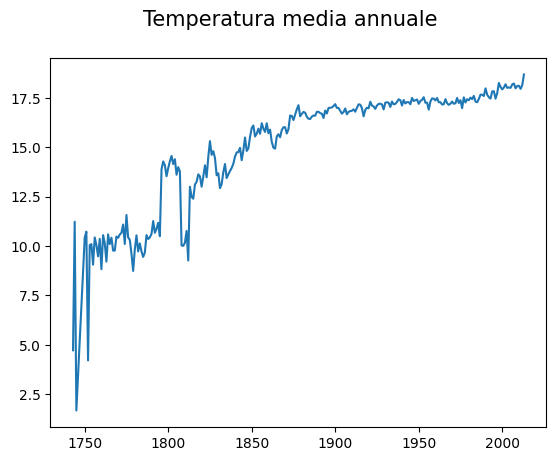

In [287]:
temp_year, temp_avg = zip(*temp_avg_temp_per_year.items())
plt.figure()
plt.suptitle('Temperatura media annuale', fontsize=15)
plt.plot(temp_year, temp_avg)
plt.show()

Il grafico rappresenta la temperatura mondiale media per ogni anno, come si pò notare la temperatura media sale con l'avanzamento negli anni.
Le temperature nei primi anni presenti nel dataset non seguono un "trend" come nel resto del grafico.

## Yield Dataset

In [306]:
yield_data = pd.read_csv('WheatPricePredictor/yield.csv')
yield_data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [307]:
yield_data.isna().sum()

Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64

In [308]:
yield_data.describe()

,Area Code,Element Code,Item Code,Year Code,Year,Value
count,56717.000000,56717.0,56717.000000,56717.000000,56717.000000,56717.000000
mean,125.650422,5419.0,111.611651,1989.669570,1989.669570,62094.660084
std,75.120195,0.0,101.278435,16.133198,16.133198,67835.932856
min,1.000000,5419.0,15.000000,1961.000000,1961.000000,0.000000
25%,58.000000,5419.0,56.000000,1976.000000,1976.000000,15680.000000
50%,122.000000,5419.0,116.000000,1991.000000,1991.000000,36744.000000
75%,184.000000,5419.0,125.000000,2004.000000,2004.000000,86213.000000
max,351.000000,5419.0,489.000000,2016.000000,2016.000000,1000000.000000


Dalla tabella si può osservare che sono presenti stati che non hanno prodotto grano in un determinato anno

Alcune colonne sono ripetitive o non utili ai fini dello studio quindi decido di eliminarle

In [309]:
yield_data = yield_data.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item Code', 'Element Code', 'Element', 'Unit'])

Per il nostro studio è necessario sapere solo la produzione di grano e non di tutti i prodotti del dataset, quindi elimino le righe non utili

In [310]:
wheat_yield_data = yield_data[yield_data['Item']=='Wheat']
wheat_yield_data

,Area Code,Area,Item,Year,Value
168,2,Afghanistan,Wheat,1961,10220
169,2,Afghanistan,Wheat,1962,9735
170,2,Afghanistan,Wheat,1963,8317
171,2,Afghanistan,Wheat,1964,9510
172,2,Afghanistan,Wheat,1965,9723
...,...,...,...,...,...
56712,181,Zimbabwe,Wheat,2012,24420
56713,181,Zimbabwe,Wheat,2013,22888
56714,181,Zimbabwe,Wheat,2014,21357
56715,181,Zimbabwe,Wheat,2015,19826


Creo un grafico per rappresentare i 10 paesi con la produzione media in tutto il dataset maggiore

In [311]:
yield_country_list = wheat_yield_data['Area'].unique()
avg_wheat_production_per_country = {}
for i in yield_country_list:
    avg_wheat_production_per_country[i] = wheat_yield_data[wheat_yield_data['Area']==i]['Value'].mean()

In [226]:
avg_wheat_production_per_country = sorted(avg_wheat_production_per_country.items(), key=lambda kv: kv[1], reverse=True)
avg_wheat_production_per_country = avg_wheat_production_per_country[:10]

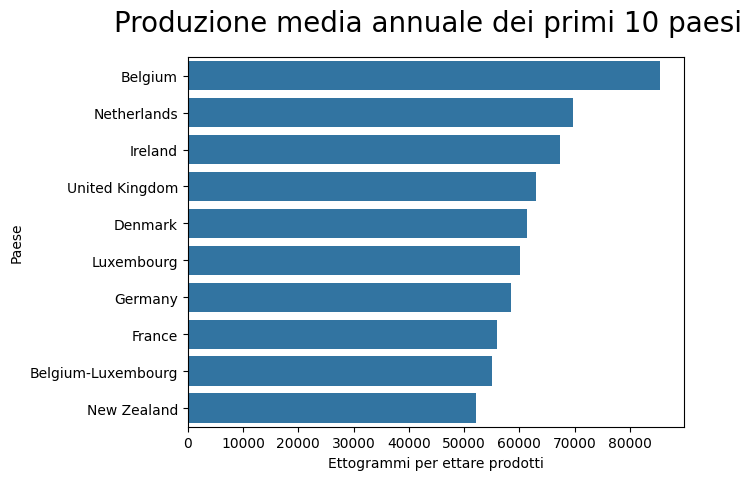

In [231]:
area, value = zip(*avg_wheat_production_per_country)
plt.figure()
plt.suptitle('Produzione media annuale dei primi 10 paesi', fontsize=20)
sns.barplot(y = area, x = value)
plt.xlabel('Ettogrammi per ettare prodotti')
plt.ylabel('Paese')
plt.show()

Nel seguente grafico rappresento invece la media mondiale di produzione di grano per ogni anno

In [150]:
avg_production_per_year_dict = {}
yield_year_list = yield_data['Year'].unique()
yield_year_list.sort()
for i in yield_year_list:
    avg_production_per_year_dict[i] = yield_data[yield_data['Year']==i]['Value'].mean()

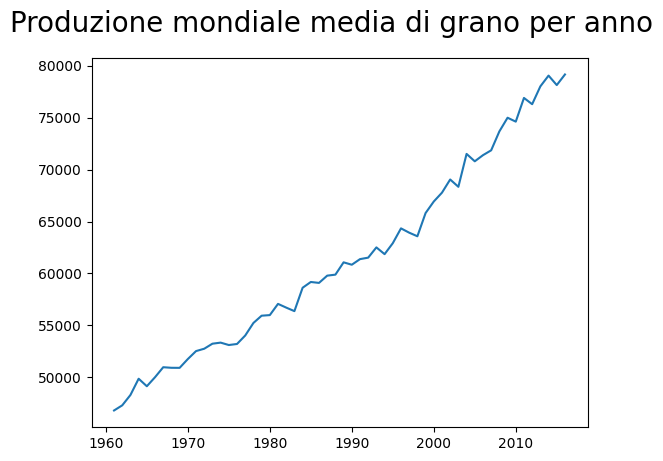

In [190]:
years, prod = zip(*avg_production_per_year_dict.items())
plt.figure()
plt.suptitle('Produzione mondiale media di grano per anno', fontsize=20)
#sns.barplot(y = prod, x = years)
sns.lineplot(y = prod, x = years)
plt.show()